1. Find the best and worst cases for the Gale-Shapley and Irving ( An Efficient Algorithm for the “Stable Roommates” Problem) Algorithms and run in Colab these algorithms for those cases for n=4 and 40.
Gale–Shapley algorithm simply explained – towardsdatascience
Stable Marriage Problem – geeksforgeeks
Stable matching, as a game – towardsdatascience.com

##Gale–Shapley algorithm

In [1]:
import random

def generate_random_preferences(n):
    men_preferences = []
    women_preferences = []

    for _ in range(n):
        # Genera listas aleatorias de preferencias para hombres y mujeres
        men_prefs = list(range(n))
        random.shuffle(men_prefs)
        men_preferences.append(men_prefs)

        women_prefs = list(range(n))
        random.shuffle(women_prefs)
        women_preferences.append(women_prefs)

    return men_preferences, women_preferences


In [2]:
def gale_shapley(men_preferences, women_preferences):
    n = len(men_preferences)
    engaged = [-1] * n  # Inicialmente, nadie está comprometido
    men_proposals = [0] * n  # El número de propuestas que ha hecho cada hombre

    while men_proposals.count(n) != n:  # Mientras haya hombres sin compromiso
        for man in range(n):
            if men_proposals[man] == n:
                continue  # El hombre ya ha propuesto a todas las mujeres
            woman = men_preferences[man][men_proposals[man]]
            men_proposals[man] += 1

            if engaged[woman] == -1:  # La mujer está libre
                engaged[woman] = man
            else:
                current_man = engaged[woman]
                if women_preferences[woman].index(man) < women_preferences[woman].index(current_man):
                    engaged[woman] = man
                    men_proposals[current_man] = n  # El hombre pierde su compromiso


    return engaged


In [3]:
men_preferences1, women_preferences1 = generate_random_preferences(4)
print("With n = 4")
result1 = gale_shapley(men_preferences1,women_preferences1)
print(result1)

men_preferences2, women_preferences2 = generate_random_preferences(40)
result2 = gale_shapley(men_preferences2,women_preferences2)
print("With n = 40")
print(result2)

With n = 4
[1, 2, 2, 2]
With n = 40
[38, 0, 26, 9, 37, 28, 28, 38, 23, 8, 0, 28, 12, 22, 20, 38, 39, 9, 37, 5, 38, 38, 1, 1, 10, 15, 38, 38, 38, 37, 37, 11, 37, 38, 38, 30, 17, 39, 9, 0]


2. Run the Gale-Shapley Algorithm 100 times using random permutations as preference lists for n=4 and 40. Find the minimum, maximum and average number of iterations and plot the distribution of the number of iterations.

For n=4:
Minimum iterations: 0
Maximum iterations: 4
Average iterations: 2.105

For n=40:
Minimum iterations: 2
Maximum iterations: 40
Average iterations: 34.27375


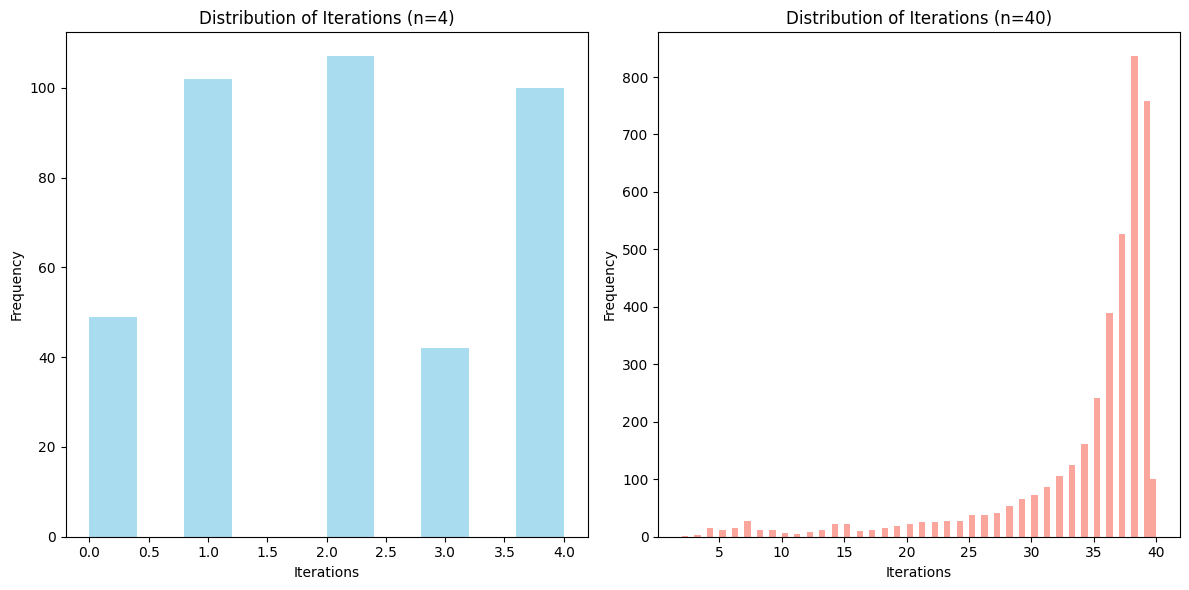

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def gale_shapley(men_preferences, women_preferences):
    n = len(men_preferences)
    engaged = [-1] * n  # Inicialmente, nadie está comprometido
    men_proposals = [0] * n  # El número de propuestas que ha hecho cada hombre

    iterations = []

    while men_proposals.count(n) != n:  # Mientras haya hombres sin compromiso
        for man in range(n):
            if men_proposals[man] == n:
                continue  # El hombre ya ha propuesto a todas las mujeres
            woman = men_preferences[man][men_proposals[man]]
            men_proposals[man] += 1

            if engaged[woman] == -1:  # La mujer está libre
                engaged[woman] = man
            else:
                current_man = engaged[woman]
                if women_preferences[woman].index(man) < women_preferences[woman].index(current_man):
                    engaged[woman] = man
                    men_proposals[current_man] = n  # El hombre pierde su compromiso

        iterations.append(men_proposals.count(n))

    return iterations

def run_experiment(n, num_trials):
    all_iterations = []
    min_iterations = float('inf')
    max_iterations = 0
    total_iterations = 0

    for _ in range(num_trials):
        men_pref = [np.random.permutation(n).tolist() for _ in range(n)]
        women_pref = [np.random.permutation(n).tolist() for _ in range(n)]
        iterations = gale_shapley(men_pref, women_pref)
        all_iterations.extend(iterations)

        min_iterations = min(min_iterations, min(iterations))
        max_iterations = max(max_iterations, max(iterations))
        total_iterations += sum(iterations)

    avg_iterations = total_iterations / (n * num_trials)

    return all_iterations, min_iterations, max_iterations, avg_iterations

# For n=4
n = 4
num_trials = 100
iterations_4, min_iter_4, max_iter_4, avg_iter_4 = run_experiment(n, num_trials)

# For n=40
n = 40
iterations_40, min_iter_40, max_iter_40, avg_iter_40 = run_experiment(n, num_trials)

# Results
print("For n=4:")
print(f"Minimum iterations: {min_iter_4}")
print(f"Maximum iterations: {max_iter_4}")
print(f"Average iterations: {avg_iter_4}")

print("\nFor n=40:")
print(f"Minimum iterations: {min_iter_40}")
print(f"Maximum iterations: {max_iter_40}")
print(f"Average iterations: {avg_iter_40}")

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(iterations_4, bins='auto', alpha=0.7, color='skyblue')
plt.title('Distribution of Iterations (n=4)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(iterations_40, bins='auto', alpha=0.7, color='salmon')
plt.title('Distribution of Iterations (n=40)')
plt.xlabel('Iterations')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
